In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import nltk
from pypdf import PdfReader
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Read the course evaluation surveys
survey = PdfReader("survey.pdf")
text = ""
for page in survey.pages:
    text = text + page.extract_text(0) + "\n"
print(text[0:200])

What is the instructor doing that is helpful for your learning? What are they doing to address the 
challenges of the online learning environment?  
(Instructor Text/Memo)  
 
Young, Wu Instructor  
T


In [3]:
# Tokenize and find the most frequently used 10 tokens (not useful).
tokens = nltk.word_tokenize(text)
freq = nltk.probability.FreqDist(tokens)
freq.most_common(10)

[('.', 201),
 ('the', 154),
 ('to', 134),
 ('I', 92),
 ('and', 88),
 ('is', 75),
 (',', 75),
 ('lecture', 67),
 ('of', 60),
 ('in', 55)]

In [4]:
# Remove punctuation
tokens_punc = [t.lower() for t in tokens if t.isalpha()]
freq = nltk.probability.FreqDist(tokens_punc)
freq.most_common(10)

[('the', 164),
 ('to', 134),
 ('i', 93),
 ('and', 89),
 ('is', 75),
 ('lecture', 67),
 ('of', 60),
 ('in', 58),
 ('he', 55),
 ('for', 46)]

In [5]:
# Remove stopwords
stop = set(nltk.corpus.stopwords.words("english"))
tokens_stop = [t for t in tokens_punc if not t in stop]
freq = nltk.probability.FreqDist(tokens_stop)
freq.most_common(10)

[('lecture', 67),
 ('notes', 42),
 ('code', 35),
 ('lectures', 29),
 ('like', 28),
 ('helpful', 27),
 ('class', 27),
 ('yet', 22),
 ('good', 21),
 ('questions', 20)]

In [6]:
# Combine words that are the same, e.g. "lecture" vs "lectures"
lemma = nltk.stem.WordNetLemmatizer()
tokens_lemma = [lemma.lemmatize(t) for t in tokens_stop]
freq = nltk.probability.FreqDist(tokens_lemma)
freq.most_common(10)

[('lecture', 96),
 ('note', 43),
 ('code', 38),
 ('class', 31),
 ('like', 28),
 ('helpful', 27),
 ('question', 24),
 ('yet', 22),
 ('good', 21),
 ('material', 21)]

In [7]:
# Print out the results
new_text = " ".join(tokens_lemma)
print(new_text[0:200])

instructor helpful learning address challenge online learning environment instructor young wu instructor instructor seems good explaining complicated concept idk interact much yet quick respond feel l


(-0.5, 399.5, 199.5, -0.5)

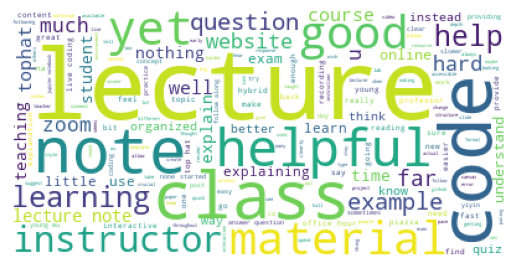

In [8]:
# Plot the frequent word in a word cloud
cloud = WordCloud(background_color = "white").generate(new_text)
plt.imshow(cloud)
plt.axis("off")